In [96]:
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
express_timeseries_df = pd.read_csv('/home/npruitt/repos/csv_files/express_app_load_test_timeseries_data.csv')
fastapi_timeseries_df = pd.read_csv('/home/npruitt/repos/csv_files/fastapi_app_load_test_timeseries_data.csv')

In [111]:
express_timeseries_df
fastapi_timeseries_df

,metric_name,timestamp,metric_value,check,error,error_code,expected_response,group,method,name,proto,scenario,service,status,subproto,tls_version,url,extra_tags,metadata
0,http_reqs,1690976758,1.000000,NaN,NaN,NaN,True,NaN,GET,http://127.0.0.1:8000/person/1,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://127.0.0.1:8000/person/1,NaN,NaN
1,http_req_duration,1690976758,5.032955,NaN,NaN,NaN,True,NaN,GET,http://127.0.0.1:8000/person/1,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://127.0.0.1:8000/person/1,NaN,NaN
2,http_req_blocked,1690976758,0.443702,NaN,NaN,NaN,True,NaN,GET,http://127.0.0.1:8000/person/1,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://127.0.0.1:8000/person/1,NaN,NaN
3,http_req_connecting,1690976758,0.306765,NaN,NaN,NaN,True,NaN,GET,http://127.0.0.1:8000/person/1,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://127.0.0.1:8000/person/1,NaN,NaN
4,http_req_tls_handshaking,1690976758,0.000000,NaN,NaN,NaN,True,NaN,GET,http://127.0.0.1:8000/person/1,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://127.0.0.1:8000/person/1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112815,iterations,1690976879,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,default,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112816,data_sent,1690976879,88.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,default,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112817,data_received,1690976879,151.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,default,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112818,iteration_duration,1690976879,1009.713135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,default,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
express_timeseries_df = express_timeseries_df[['metric_name', 'timestamp', 'metric_value']]
fastapi_timeseries_df = fastapi_timeseries_df[['metric_name', 'timestamp', 'metric_value']]

In [113]:
express_timeseries_df = express_timeseries_df[express_timeseries_df['metric_name'] == 'http_req_duration'][['timestamp', 'metric_value']]
fastapi_timeseries_df = fastapi_timeseries_df[fastapi_timeseries_df['metric_name'] == 'http_req_duration'][['timestamp', 'metric_value']]

In [123]:
express_timeseries_df['metric_value'].describe()

count    9018.000000
mean        4.550526
std         1.875333
min         0.331235
25%         3.280167
50%         4.252252
75%         5.425413
max        28.684136
Name: metric_value, dtype: float64

In [101]:
express_http_duration_timeseries_df = express_timeseries_df.groupby(express_timeseries_df['timestamp']).median()
fastapi_http_duration_timeseries_df = fastapi_timeseries_df.groupby(fastapi_timeseries_df['timestamp']).median()

In [102]:
# create 'timestamp' column out of index
express_http_duration_timeseries_df = express_http_duration_timeseries_df.reset_index()
fastapi_http_duration_timeseries_df = fastapi_http_duration_timeseries_df.reset_index()

In [103]:
timeseries = express_http_duration_timeseries_df['timestamp']
fastapi_timeseries = fastapi_http_duration_timeseries_df['timestamp']

In [104]:
fastapi_timeseries_start_time = fastapi_timeseries[0]
fastapi_timeseries = fastapi_timeseries.apply(lambda x: x - fastapi_timeseries_start_time)

In [105]:
timeseries_start_time = timeseries[0]
timeseries = timeseries.apply(lambda x: x - timeseries_start_time)

In [106]:
print(fastapi_http_duration_timeseries_df.head())
print(fastapi_http_duration_timeseries_df)

    timestamp  metric_value
0  1690976758      5.032955
1  1690976759      5.398617
2  1690976760      5.807573
3  1690976761      5.444044
4  1690976762      5.400047
      timestamp  metric_value
0    1690976758      5.032955
1    1690976759      5.398617
2    1690976760      5.807573
3    1690976761      5.444044
4    1690976762      5.400047
..          ...           ...
116  1690976874      6.526903
117  1690976875      4.957503
118  1690976876      4.977946
119  1690976877      1.929000
120  1690976878      7.933132

[121 rows x 2 columns]


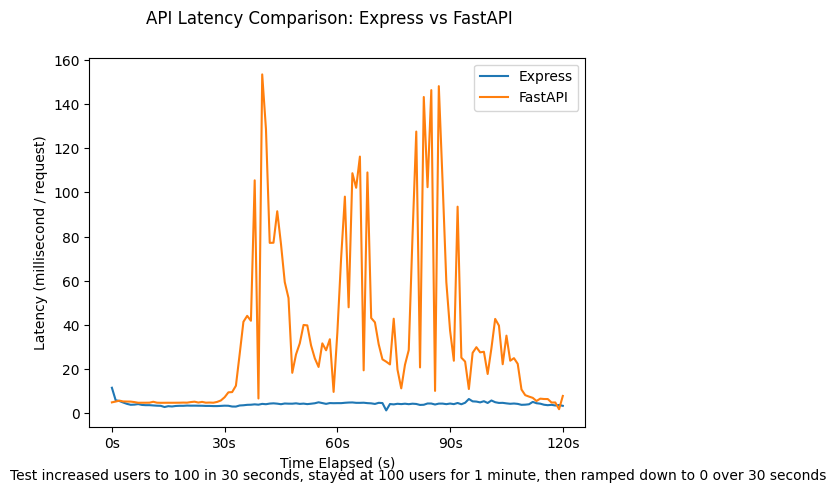

In [138]:
fig, ax = plt.subplots(1,1)
ax.plot(timeseries, express_http_duration_timeseries_df['metric_value'], label="Express")
ax.plot(fastapi_timeseries, fastapi_http_duration_timeseries_df['metric_value'], label="FastAPI")
ax.set_ylabel('Latency (millisecond / request)')
ax.set_xlabel('Time Elapsed (s)')
ax.set_xticks([0, 30, 60, 90, 120], labels=['0s', '30s', '60s', '90s', '120s'])
ax.legend()
fig.suptitle('API Latency Comparison: Express vs FastAPI')
fig.text(.001, 0, "Test increased users to 100 in 30 seconds, stayed at 100 users for 1 minute, then ramped down to 0 over 30 seconds")
fig.savefig('./load_test_comparison_timeseries.png')
plt.show()

In [108]:
ax.get_xticklabels()

[Text(0, 0, '0s'), Text(30, 0, '30s'), Text(60, 0, '60s')]

<Axes: xlabel='timestamp'>

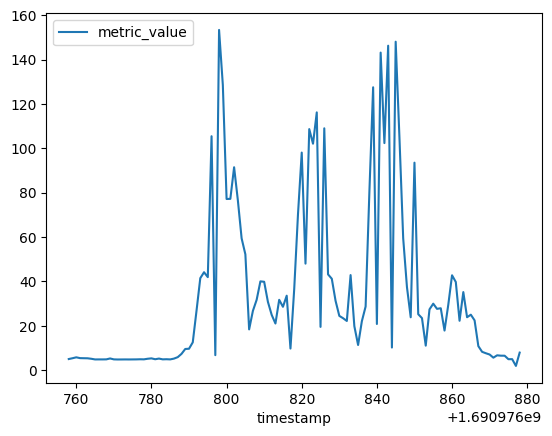

In [109]:
fastapi_http_duration_timeseries_df.plot('timestamp', 'metric_value')